In [2]:
from lightkurve import TessLightCurve, TessLightCurveFile
from astropy.io import fits
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from random import randint, sample

In [10]:
def plotChelseaLC(filepath, ax=None, sigma=3, colors=['r', 'b'], markers=['.', '.'], **kwargs):
    """
    Master function to make simple plots for Chelsea's plots
    
    :param filpath: Filepath to FITS file. 
    :param sigma: Mask away data points that are # standard deviations from mean.
    :param colors: tuple of strings with color accepted label for good, and bad data respectively
    :param markers: tuple of strings with marker-accepted label for good, and bad data respectively
    :param pshow: Boolean to control whether you want to display right away. Default: True
    """
    if ax is None:
        # Start up figure and axes if aren't given
        fig, ax = plt.subplots()
    
    # Define parameters for plotting
    good_format = colors[0] +  markers[0]
    bad_format = colors[1] + markers[1]
    
    
    # Set alpha if not defined before
    if 'alpha' not in kwargs:
        kwargs['alpha'] = 1/2
    
    # Open up fits file with context manager
    with fits.open(filepath) as hdul:
        data = hdul[1].data
        
        # Get mask for bad cadence selection
        bad_quality = data['QUALITY'].astype(bool)
        
        # Get mask for data within #sigma standard deviations away from mean
        clipped = np.abs(data['SAP_FLUX'] - data['SAP_FLUX'].mean()) < sigma*data['SAP_FLUX'].std()
        
        # Set object TIC id as title for plot
        ax.set_title(hdul[0].header['OBJECT'])
        
        # plot bad clipped quality data vs # of days passed since first data pt
        ax.plot(data["TIME"][bad_quality & clipped] - data['TIME'][0], 
                 data["SAP_FLUX"][bad_quality & clipped], bad_format, label='Bad', **kwargs)
        # plot good data vs # of days passed since first data pt
        ax.plot(data["TIME"][~bad_quality] - data['TIME'][0],
                 data["SAP_FLUX"][~bad_quality], good_format, label='Good', **kwargs)
        
    
    # Set x/y labels accodingly, and display legend
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Normalized Flux')
    
    return ax


def subplotLC(filepaths, figargs=None, **kwargs):
    """
    Function that will make a canvas with 4 subplots with 2 rows/columns.
    It will plot the given light curves using `plotChelseaLC`.
    
    :param: filepaths: list of 4 file paths to the light curves
    :param figargs: dictionary with keyword arguments to pass to figure generation
    :param kwargs: extra keyword arguments to pass to `plotChelseaLC`
    """
    # Print out warning if filepaths has more/less than 4 elements
    if len(filepaths) != 4:
        print("WARNING: Given more/less than 4 files. Results may vary.")
    
    # Make sure figargs exists and has sharex='col' & figsize=(8,5)
    if figargs is None:
        figargs = dict(sharex='col', figsize=(8,5))
    else:
        figargs['sharex'] = 'col'
        # Assign custom figure size if not given
        if 'figsize' not in figargs:
            figargs['figsize'] = 8,5

    # Generate 2x2 plot
    fig, axes = plt.subplots(2, 2, **figargs)

    # loop over filepaths with its respective axis to plot
    for filepath, ax in zip(filepaths, axes.ravel()):
        plotChelseaLC(filepath, ax, **kwargs)

    
    # Undo axis labeling from `plotChelseaLC` to save space
    axes[0,1].set_xlabel('')
    axes[0,1].set_ylabel('')
    axes[0,1].set_xlabel('')
    axes[1,1].set_ylabel('')

    # Auto correct subplots layout
    fig.tight_layout()
    return axes

In [4]:
# Make list of filepaths to Chealsea's light curves
filepaths = glob('../ClusterQuality/Sector8/*.gz')

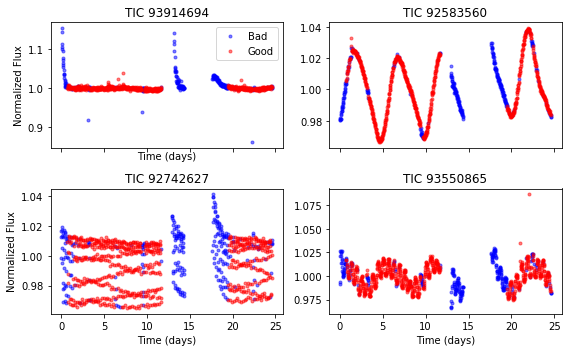

In [13]:
# Get random sample of 4 filepaths
files = sample(filepaths, 4)

# make 2x2 plot
ax = subplotLC(files)
ax[0,0].legend()